# Assignment 10

### 1.复习上课内容

### 2. 回答一下理论题目

#### 1. What is independent assumption in Naive bayes ?

The conditional independence assumption states that features are independent of each other given the class

#### 2. What is MAP(maximum a posterior) and ML(maximum likelihood) ?

Maximum Likelihood Estimation (MLE) and Maximum A Posteriori (MAP), are both a method for estimating some variable in the setting of probability distributions or graphical models. They are similar, as they compute a single estimate, instead of a full distribution.

MAP=argmax P(h|D) = argmax P(D|h)P(h)

MLE=argmax P(D|h)

The only thing differs is the inclusion of prior in MAP. It means the likelihood is weighted with some weight coming from the prior.

#### 3. What is support vector in SVM?

A SVM performs classification by finding the hyperplane that maximizes the margin between the two classes. Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane.

#### 4. What is the intuition behind SVM ?

It is a method for classification that chooses a hyperplane so that the distance from it to the nearest data point on each side is maximize.

#### 5. Shortly describ what 'random' means in random forest ?

It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction is more accurate than that of any individual tree.

#### 6. What cariterion does XGBoost use to find the best split point in a tree ?

- a weighted quantile sketch procedure to handle instance weights

To find the best split over a continuous feature, data needs to be sorted and fit entirely into memory. This may be a problem in case of large datasets. Candidate split points are proposed based on the percentiles of feature distribution.

- a novel algorithm for handling sparse data

XGBoost is able to handle the sparsity by learning the best imputation value from the data for the missing values. The best imputation value is then chosen by the value that results in the greatest reduction in training loss

- a cache-aware block structure for out-of-core computation

To reduce the cost of sorting, XGBoost stores data in block structures. Data in each block is stored in a compressed column format, and each column is sorted according to its corresponding feature value. As a result, XGBoost can use multiple blocks when using approximate algorithms, enabling a parallelized learning process. This block structure greatly reduces the complexity of split finding.

### 3. Practial part

##### Problem description: In this part you are going to build a classifier to detect if a piece of news is published by the Xinhua news agency (新华社）.

#### Hints:

###### 1. Firstly, you have to come up with a way to represent the news. (Vectorize the sentence, you can find different ways to do so online)  

###### 2. Secondly,  pick a machine learning algorithm that you think is suitable for this task

In [1]:
import pandas as pd
import numpy as np
import re
import jieba

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score

In [2]:
data = pd.read_csv('新华社数据.csv', encoding='gb18030')
data = pd.concat([data['source'], data['content']], axis=1)
data = data.dropna()
data.size

174104

In [3]:
data.head()

,source,content
0,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
1,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
2,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...
3,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n
4,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...


In [4]:
with open("cn_stopwords.txt", "r") as f:
    stop_words = f.read().split()

In [5]:
def token(text):
    return re.findall('\w+', text)

def news2vec(text):
    return ' '.join(list(jieba.cut(''.join(token(text)))))

def target(text):
    return 1 if "新华社" in text else 0

In [6]:
content = np.asarray([news2vec(s) for s in data["content"].head(100000)])

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/ns/kcb8yjxs6qx72w25lyg4m_jc0000gn/T/jieba.cache
Loading model cost 0.882 seconds.
Prefix dict has been built successfully.


In [7]:
source = np.asarray([target(s) for s in data["source"].head(100000)])

In [8]:
assert len(source) == len(content)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(content, source, test_size=0.2)

In [10]:
X_train[0]

'新华社 照片 外代 2016 年 11 月 25 日 n 外代 二线 走进 白俄罗斯 达克 农场 n 这是 11 月 18 日 在 白俄罗斯 明斯克 市 附近 的 达克 农场 拍摄 的 奶山羊 n 新华社 卫星 社'

In [11]:
Y_train[0]

1

In [12]:
tfidf_vec = TfidfVectorizer(stop_words=stop_words)
X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

In [13]:
RF = RandomForestClassifier()
RF.fit(X_train_vec, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [14]:
RF.score(X_test_vec, Y_test)

0.958589397507323

In [15]:
Y_pred = RF.predict(X_test_vec)
roc_auc_score(Y_test, Y_pred)

0.786230939501108

### Congratulations! You have completed all assignments in this week. The question below is optional. If you still have time, why don't try it out.

## Option:

#### Try differnt machine learning algorithms with different combinations of parameters in the practical part, and compare their performances (Better use some visualization techiniques).

In [19]:
from sklearn.svm import SVC

content_short = content[:10000]
source_short = source[:10000]
X_train, X_test, Y_train, Y_test = train_test_split(content_short, source_short, test_size=0.2)
tfidf_vec = TfidfVectorizer(stop_words=stop_words)
X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

In [20]:
svm = SVC()
svm.fit(X_train_vec,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
svm.score(X_test_vec, Y_test)

0.955

In [22]:
Y_pred = svm.predict(X_test_vec)
roc_auc_score(Y_test, Y_pred)

0.868042352907668

<Figure size 432x288 with 0 Axes>

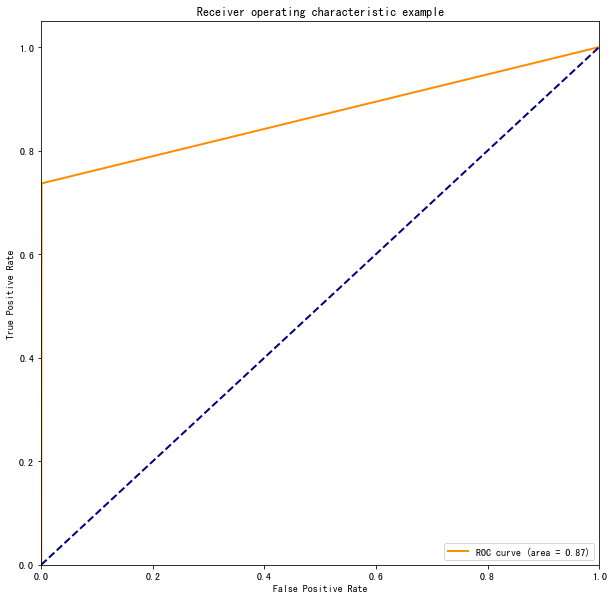

In [24]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr,tpr,threshold = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr,tpr)
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")

The svm can't handle large data, compared to random forest.